In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,9

# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [3]:
df = pd.read_csv('./hw_2/electric')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

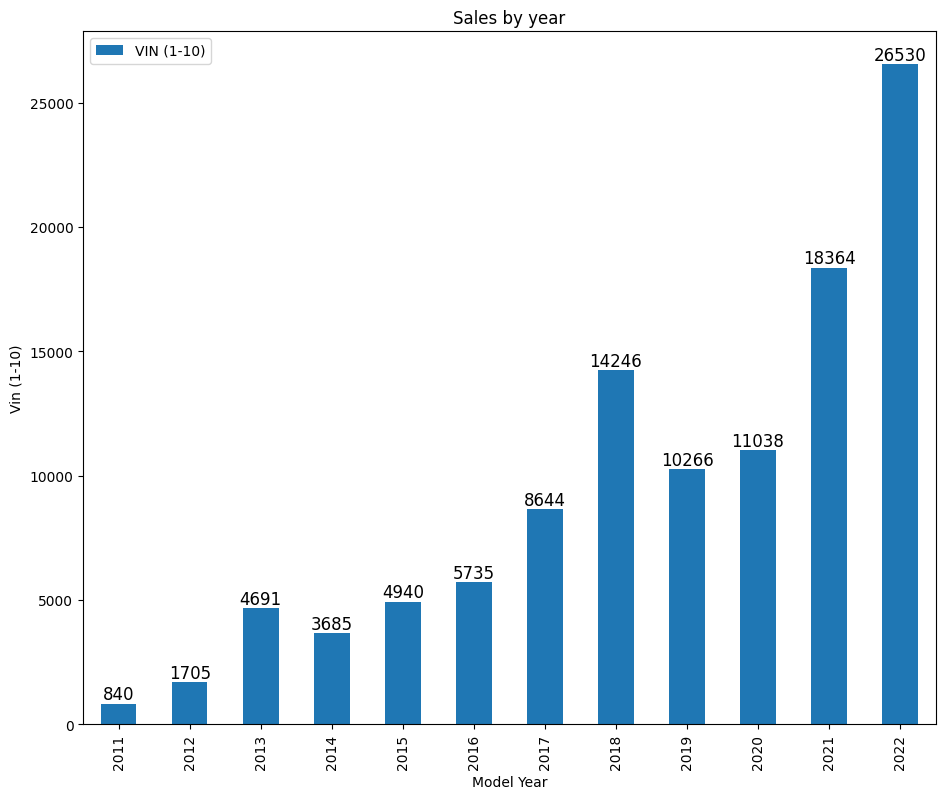

In [5]:
# График 1 - продажи электромобилей по годам
sales_by_year = df[['Model Year', 'VIN (1-10)']][(df['Model Year']>=2011) & (df['Model Year']<=2022)].groupby('Model Year').count()
sales_by_year.plot(
    kind='bar',
    xlabel='Model Year',
    ylabel='Vin (1-10)',
    title='Sales by year'
)
plt.legend(loc=('upper left'))
for i, val in enumerate(sales_by_year.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

In [6]:
# Количество продаваемых в США электромобилей растёт с 2011 года.

In [7]:
# График 2 - карта продаж по штатам
# !Т.к. исходные данные "кривые", подавляющее большинство а/м продано в штате Washington, то для целей тренировки эти данные решил исключить
import folium
m = folium.Map(location=[40, -95], zoom_start=4) # initialize the map and store it in a m object
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json" # загрузка занных по штатам
sales_by_state = df[['State', 'Model Year', 'VIN (1-10)']][(df['Model Year']>=2011) & (df['Model Year']<=2022) & (df['State']!='WA')].groupby(['State', 'Model Year']).count().reset_index() # датафрейм по продажам
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=sales_by_state,
    columns=["State", "VIN (1-10)"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)
folium.LayerControl().add_to(m)
m

In [8]:
# Электроавтомобили продаются, в основном, в Калифорнии (CA) и Вашингтоне (DC), т.е. в столичном штате на восточном побережье и самом богатом штате на западном. 
# В остальных штатах продажи электроавтомобилей распределены равномерно.
# ! Помним о том, что для наглядности данные были модифицированы вручную.

<AxesSubplot: xlabel='Model Year', ylabel='Make'>

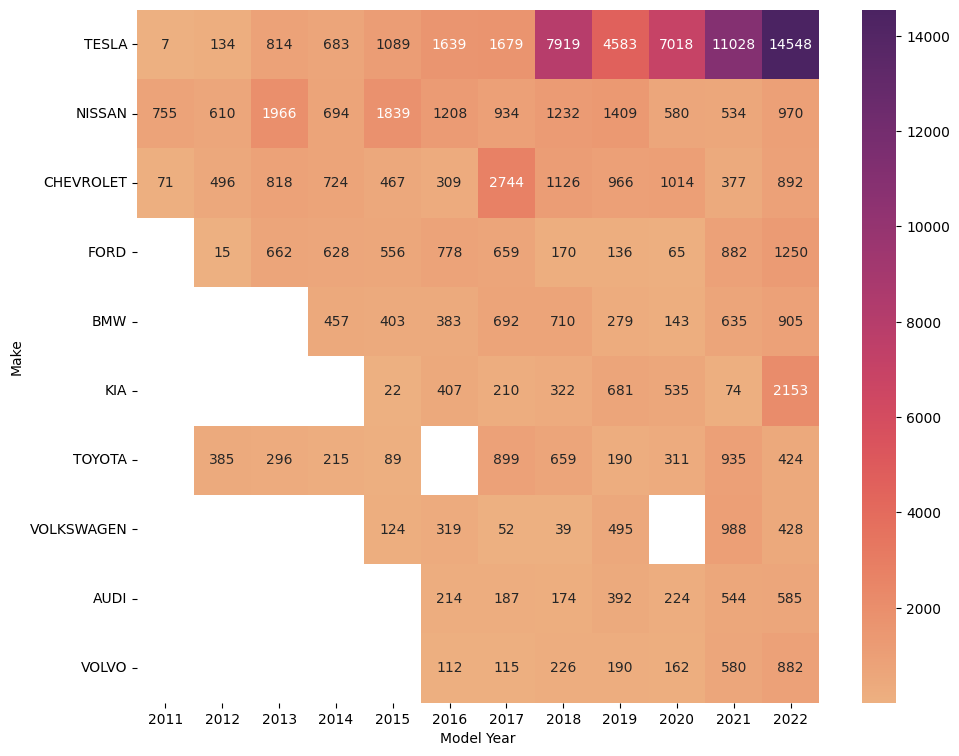

In [9]:
# График 3 - распределение по брендам по годам
import seaborn as sns
import numpy as np
sales_by_brand_by_year = df[['Make', 'Model Year', 'VIN (1-10)']][(df['Model Year']>=2011) & (df['Model Year']<=2022)].groupby(['Make', 'Model Year']).count().reset_index()
sales_by_brand_by_year = sales_by_brand_by_year.pivot_table(
    index='Make', columns='Model Year', values='VIN (1-10)', margins=True, aggfunc='sum').sort_values('All', ascending=False).drop('All').drop(columns='All').head(10)
sns.heatmap(sales_by_brand_by_year, cmap='flare', annot=True, fmt=".0f")

<AxesSubplot: >

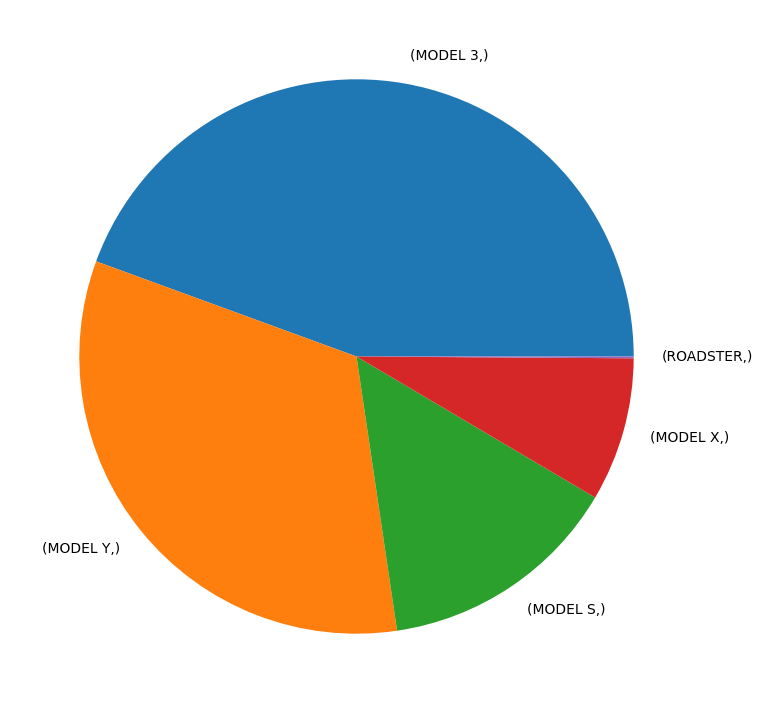

In [10]:
# какие бренды из топ-10 сколько продали электроавтомобилей по годам. Как видно, абсолютный либер в последние 5 лет - тесла
sales_tesla_by_model = df[['Model']][df['Make']=='TESLA'].value_counts()
sales_tesla_by_model.plot(
    kind='pie'
    # xlabel='Model Year',
    # ylabel='Model',
    # title='Sales by year'
)

In [11]:
# какая структура моделей в продажах Тесла? Основные продажи приходятся на две модели Model 3 и Model Y.